# Modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import HTfunctions as ht

# Functions

# Plots

## Streamflow

Results/Daily/trendMagnitudes_PROstreamflow_ost_10dMA_1983_2012.npy
PROstreamflow_ost_10dMA_1983_2012


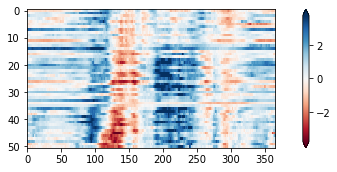

In [70]:
# selecting array
region = "ost"
var = "PROstreamflow"
resDir = "Results/Daily"
MA = "10"
period = "1983_2012"
signFilter = False

# find array-file
files = ht.findFiles(f"*Mag*_{var}_*{region}*{MA}*{period}*.npy",resDir)
if len(files)>1:
    print(files)
else:
    file = files[0]
    print(file)

name = "_".join(file.split("/")[-1].split(".")[0].split("_")[1:])
print(name)

array = np.load(file)

# filtering magnitudes by significance
if signFilter:
    file = ht.findFiles(f"*Sig*{name}*.npy",resDir)[0]
    sf = np.load(file)
    array = np.ma.masked_array(array,sf==0)


# plot array
cmap = "RdBu"
#cmap = "seismic"

cbarlim = max([np.abs(array.max(axis=1).mean()),np.abs(array.min(axis=1).mean())])

kwargs = {"cmap":cmap,
          "vmin":-cbarlim,
          "vmax":cbarlim,
          "aspect":4}

N = array.shape[0]

plt.figure(figsize=(10,N/20))
plt.imshow(array,**kwargs)
plt.colorbar(extend="both")

0.13070353150722233